In [1]:
!pip install dgl
!pip install torch_geometric
#!pip install pandas google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

In [2]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import plotly.graph_objects as go

In [3]:
df_10 = pd.read_csv("parsed_GMn_dataset(11495_seg0).txt", sep=" ", header=None)
df_11 = pd.read_csv("parsed_GMn_dataset(11495_seg5).txt", sep=" ", header=None)
df_12 = pd.read_csv("parsed_GMn_dataset(11495_seg6).txt", sep=" ", header=None)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
column_names=["nevent","Number of Tracks Found","Number of good hits on all tracks","Hits on track 1","Hits on track 2","Hits on track 3","Track index","GEM Layer","Global X","Global Y",
              "Global X_Layer0","Global Y_Layer0","Layer0_On Track?",
              "Global X_Layer1","Global Y_Layer1","Layer1_On Track?",
              "Global X_Layer2","Global Y_Layer2","Layer2_On Track?",
              "Global X_Layer3","Global Y_Layer3","Layer3_On Track?",
              "Global X_Layer4","Global Y_Layer4","Layer4_On Track?"]

df_10.columns = column_names
df_11.columns = column_names
df_12.columns = column_names

In [6]:
dataframes = [df_10, df_11, df_12]

adjustment = 0
result_dfs = []

for df_temp in dataframes:
    df_copy = df_temp.copy()
    df_copy['nevent'] += adjustment
    result_dfs.append(df_copy)

    adjustment = df_copy['nevent'].iloc[-1] + 1

df = pd.concat(result_dfs, axis=0, ignore_index=True)

In [7]:
df_filtered = df

In [8]:
import numpy as np
import torch
import torch_geometric
from torch_geometric.data import Data
from scipy.spatial.distance import cdist

In [9]:
data_list = []

nevent = []
dataset = []
y = []
edges = []
dataset_2D = []
hit_layer = []
dist_test = []

'''
for event in range(df_filtered['nevent'].nunique()):
    if (df_filtered['nevent'].isin([event]).any()):
        df_portion = df_filtered[df_filtered['nevent']==event]
'''


for i in range(len(df_filtered['nevent'].unique())):

    event = df_filtered['nevent'].unique()[i]

    if (df_filtered['nevent'].isin([event]).any()):
        df_portion = df_filtered[df_filtered['nevent']==event]


        layer = []
        layer_X = []
        layer_Y = []
        layer_Z = []
        target = []
        coordinates = [[], [], []]
        edge_index = []
        coordinates_2D = [[], []]


        r_values = []
        theta_values = []


        #if 0 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer0'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]['Global X_Layer0'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]['Global Y_Layer0'].values.tolist())
        layer_Z += [1] * ((df_portion['Global X_Layer0'] != 0).sum())
        layer += [0] * ((df_portion['Global X_Layer0'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]["Layer0_On Track?"].values.tolist())

#if 1 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer1'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]['Global X_Layer1'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]['Global Y_Layer1'].values.tolist())
        layer_Z += [2] * ((df_portion['Global X_Layer1'] != 0).sum())
        layer += [1] * ((df_portion['Global X_Layer1'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]["Layer1_On Track?"].values.tolist())


#if 2 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer2'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]['Global X_Layer2'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]['Global Y_Layer2'].values.tolist())
        layer_Z += [3] * ((df_portion['Global X_Layer2'] != 0).sum())
        layer += [2] * ((df_portion['Global X_Layer2'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]["Layer2_On Track?"].values.tolist())


#if 3 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer3'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]['Global X_Layer3'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]['Global Y_Layer3'].values.tolist())
        layer_Z += [4] * ((df_portion['Global X_Layer3'] != 0).sum())
        layer += [3] * ((df_portion['Global X_Layer3'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]["Layer3_On Track?"].values.tolist())

        '''

#if 4 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer4'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]['Global X_Layer4'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]['Global Y_Layer4'].values.tolist())
        layer_Z += [5] * ((df_portion['Global X_Layer4'] != 0).sum())
        layer += [4] * ((df_portion['Global X_Layer4'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]["Layer4_On Track?"].values.tolist())
        '''

        #coordinates[0].append(layer_X)
        #coordinates[1].append(layer_Y)
        #coordinates[2].append(layer_Z)

        #column1 = np.array(coordinates)[0, 0]
        #column2 = np.array(coordinates)[1, 0]
        #column3 = np.array(coordinates)[2, 0]
        #coordinates_array = np.column_stack((column1, column2, column3))
        coordinates_2D = np.array(np.column_stack((layer_X, layer_Y)), dtype=np.float32)
        coordinates_3D = np.array(np.column_stack((layer_X, layer_Y, layer_Z)), dtype=np.float32)


        z_coordinates = layer_Z#coordinates_array[:, 2]

        #distances = 1 / (cdist(z_coordinates.reshape(-1, 1), z_coordinates.reshape(-1, 1)) + 0.1)

        ## distances_z = (cdist(z_coordinates.reshape(-1, 1), z_coordinates.reshape(-1, 1)) + 0.1)
        distances_z = (cdist(np.array(z_coordinates).reshape(-1, 1), np.array(z_coordinates).reshape(-1, 1)) + 0.1)
        distances_2D = (cdist(coordinates_2D, coordinates_2D))


        dist_test.append(distances_2D)

        distance_threshold_z = 1.2
        distance_threshold_2D = 0.03

        edge_index = []
        for i in range(len(layer_Z)):
            for j in range(i + 1, len(layer_Z)):
                if distances_z[i, j] < distance_threshold_z:
                  if distances_2D[i, j] < distance_threshold_2D:
                    edge_index.append([i, j])
                    edge_index.append([j, i])
        edge_index = np.array(edge_index).T



#### ########### ########### ########### ########### ########### ########### ########### ###########
#### FILTER FOR REACH OF THE LINKS(Set to consider events that has hits on layers - 0,1,2,3,4) ######
#### ########### ########### ########### ########### ########### ########### ########### ###########
        indices = [i for i, value in enumerate(target) if value == 1]

        # Get the corresponding values in the 'layer' array
        corresponding_layer_values = [layer[i] for i in indices]



#### ########### ########### ########### ########### ########### ########### ########### ###########
#### r, theta ######
#### ########### ########### ########### ########### ########### ########### ########### ###########

        num_coordinates = coordinates_2D.shape[0]

        # Initialize an empty 2D array for polar coordinates with the same shape
        polar_coordinates = np.zeros((num_coordinates, 2))

        # Convert to polar coordinates and store in the 2D array
        for i in range(num_coordinates):
            x, y = coordinates_2D[i]
            polar_coordinates[i, 0] = np.sqrt(x**2 + y**2)  # r
            polar_coordinates[i, 1] = np.arctan2(y, x)     # θ

        # The polar_coordinates array will contain the radial distances (r) and angles (θ) for each input coordinate.

        # Example of converting radians to degrees
        polar_coordinates_degrees = np.copy(polar_coordinates)
        polar_coordinates_degrees[:, 1] = np.degrees(polar_coordinates[:, 1])


#### ########### ########### ########### ########### ########### ########### ########### ###########
#### r, theta ######
#### ########### ########### ########### ########### ########### ########### ########### ###########



        event_data = {
            'event': df_portion['nevent'].iloc[0],
            #'coordinates': coordinates,
            'coordinates_2D': coordinates_2D,#polar_coordinates,
            'target': target,
            'edge_index': edge_index,
            'layer': layer
        }

        if (corresponding_layer_values == [0, 1, 2, 3]):
          data_list.append(event_data)

        if (corresponding_layer_values == [0, 1, 2, 3, 4]):
          data_list.append(event_data)

        if event%100 == 0:
          print(len(data_list))
          print()

0

23

44

69

96

122

164

195

220

243

263

288

311

335

361

386

414

438

463

489

518

545

568

587

608

633

643

662

688

713

737

761

788

813

838

870

889

915

932

951

974

995

1021

1050

1073

1103

1155

1176

1206

1248

1273

1292

1320

1350

1377

1399

1422

1446

1471

1494

1518

1539

1565

1586

1614

1632

1657

1677

1706

1729

1748

1773

1803

1830

1849

1873

1896

1918

1947

1977

1999

2028

2047

2079

2104

2129

2151

2184

2208

2231

2254

2275

2314

2343

2366

2418

2441

2459

2486

2506

2532

2553

2571

2598

2622

2642

2666

2694

2721

2744

2773

2827

2850

2873

2895

2919

2939

2967

2992

3016

3038

3058

3078

3103

3123

3141

3166

3188

3211

3234

3258

3279

3303

3324

3349

3373

3401

3422

3453

3483

3504

3556

3584

3618

3642

3664

3683

3708

3725

3749

3772

3797

3818

3837

3863

3889

3907

3925

3949

3969

3999

4025

4049

4075

4095

4119

4151

4168

4193

4218

4240

4264

4284

4313

4332

KeyboardInterrupt: 

In [10]:
import json

In [14]:
file_path = 'data.json'

formatted_data = []

for item in data_list:
    formatted_item = {
        'event': item['event'].tolist(),
        'coordinates_2D': item['coordinates_2D'].tolist(),
        'target': item['target'],
        'edge_index': item['edge_index'].tolist(),
        'layer': item['layer']
    }
    formatted_data.append(formatted_item)

formatted_data.append(formatted_item)

In [15]:
file_path_2 = 'data.json'

# Write the data to the JSON file
with open(file_path_2, 'w') as json_file_2:
    json.dump(formatted_data, json_file_2)

In [16]:
file_path_2 = 'data.json'  # Update to the actual path if different

# Read the JSON file and parse it into a list
with open(file_path_2, 'r') as json_file_2:
    data_list_2 = json.load(json_file_2)

In [17]:
data_list = data_list_2

In [19]:
import torch

processed_data_list = []

for event_data in data_list:
    if 6<len(event_data['target'])<130:
      event = torch.tensor(event_data['event'], dtype=torch.float)
      #coordinates_tensor = torch.tensor(event_data['coordinates'], dtype=torch.float32)
      coordinates_2D_tensor = torch.tensor(event_data['coordinates_2D'], dtype=torch.float)
      target_tensor = torch.tensor(event_data['target'], dtype=torch.int64)
      edge_index_tensor_test = torch.tensor(event_data['edge_index'], dtype=torch.int64)
      layer_tensor = torch.tensor(event_data['layer'], dtype=torch.int64)

#### ########### ########### ########### ########### ########### ########### ########### ###########
#### ########### EDGE INDEX MASKING for NO EDGES WITHIN THE SAME LAYER ##### ########### ###########
#### ########### ########### ########### ########### ########### ########### ########### ###########

      edge_index_mask = layer_tensor[edge_index_tensor_test[0]] == layer_tensor[edge_index_tensor_test[1]]
      edge_index_tensor = edge_index_tensor_test[:, ~edge_index_mask]

#### ########### ########### ########### ########### ########### ########### ########### ###########
#### ########### EDGE INDEX MASKING for NO EDGES WITHIN THE SAME LAYER ##### ########### ###########
#### ########### ########### ########### ########### ########### ########### ########### ###########

      consecutive_ones = torch.where(target_tensor == 1)[0]
      edges = []
      for i in range(len(consecutive_ones) - 1):
          edges.append([consecutive_ones[i], consecutive_ones[i + 1]])
      edge_index = torch.tensor(edges).t()

      #edge_index_tensor_can = torch.tensor(event_data['edge_index'], dtype=torch.int64)
      edge_index_tensor_can = (edge_index_tensor) #(event_data['edge_index'])



      try:
        num_nodes = edge_index_tensor_can.max().item() + 1
      except ZeroDivisionError:
        print("Error: No negative edges. Skipping this graph")
        print(edges_set)
        print(filtered_edge_index_tensor)
        continue
      ## num_nodes = edge_index_tensor_can.max().item() + 1

      # Create a set to keep track of visited edges
      visited_edges = set()

      # Create a list to store filtered edges
      filtered_edges = []

      # Iterate through each edge
      for edge in edge_index_tensor_can.T:
          src, dest = edge.tolist()
          # Check if the reverse edge has been visited
          if (dest, src) not in visited_edges:
              visited_edges.add((src, dest))
              filtered_edges.append(edge)

      # Convert the filtered edges back to a tensor
      filtered_edge_index_tensor = torch.stack(filtered_edges).T#torch.tensor(filtered_edges).T


      set_edge_can = set(map(tuple, filtered_edge_index_tensor.T.tolist()))
      set_egde_index = set(map(tuple, edge_index.T.tolist()))

      set_neg_edge_index = set_edge_can - set_egde_index
      neg_edges = torch.tensor(list(set_neg_edge_index)).T

      edges_set = {tuple(e.tolist()) for e in edge_index.t()}

      # Filter out edges that need to be removed
      filtered_edges = [e for e in filtered_edge_index_tensor if tuple(e.tolist()) not in edges_set]

      #print(edges_set)
      #print(filtered_edges)
      #print()

      # Convert filtered_edges back to a tensor

      try:
        edge_index_neg = 0 / len(neg_edges)
      except ZeroDivisionError:
        print("Error: Zero divition error")
        print(edges_set)
        print(filtered_edge_index_tensor)
        continue
      except RuntimeError:
        print("Error: No negative edges. Skipping this graph")
        print(edges_set)
        print(filtered_edge_index_tensor)
        continue



      '''
      print(edge_index)
      print(neg_edges)
      print(filtered_edge_index_tensor)
      print(layer_tensor)
      print()
      '''
      data = Data(
          event=event,
          #x=coordinates_tensor,
          x_2d=coordinates_2D_tensor,
          y=target_tensor,
          edge_index=edge_index,
          edge_index_neg = neg_edges,
          edge_index_can=filtered_edge_index_tensor,
          layer=layer_tensor
      )

      processed_data_list.append(data)

Error: Zero divition error
{(9, 10), (10, 11), (11, 12)}
tensor([[ 9, 10, 11],
        [10, 11, 12]])
Error: Zero divition error
{(2, 4), (4, 6), (6, 11)}
tensor([[ 2,  4,  6],
        [ 4,  6, 11]])
Error: Zero divition error
{(4, 5), (5, 7), (1, 4)}
tensor([[1, 4, 5],
        [4, 5, 7]])
Error: Zero divition error
{(11, 12), (4, 6), (6, 11)}
tensor([[ 4,  6, 11],
        [ 6, 11, 12]])
Error: Zero divition error
{(2, 3), (3, 8), (1, 2)}
tensor([[1, 2, 3],
        [2, 3, 8]])
Error: Zero divition error
{(8, 9), (9, 11), (1, 8)}
tensor([[ 1,  8,  9],
        [ 8,  9, 11]])
Error: Zero divition error
{(2, 3), (0, 2), (3, 4)}
tensor([[0, 2, 3],
        [2, 3, 4]])
Error: Zero divition error
{(0, 1), (1, 2), (2, 6)}
tensor([[0, 1, 2],
        [1, 2, 6]])
Error: Zero divition error
{(2, 3), (6, 7), (3, 6)}
tensor([[2, 3, 6],
        [3, 6, 7]])
Error: Zero divition error
{(4, 11), (0, 3), (3, 4)}
tensor([[ 0,  3,  4],
        [ 3,  4, 11]])
Error: Zero divition error
{(2, 4), (4, 7), (7, 1

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import DataLoader
import dgl
from dgl.data import CoraGraphDataset
from dgl.nn import GraphConv

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [309]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import DataLoader
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.nn import GATConv
from torch_geometric.nn import GINConv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Load a dataset (you can replace this with your own dataset)
dataset = processed_data_list.copy()
#graph = dataset[0]
#num_nodes = graph.number_of_nodes()

scaler = StandardScaler()

# Assuming 'dataset' is a list of Data objects
for data in dataset:
    # Perform normalization
    data.x_2d = scaler.fit_transform(data.x_2d)  # Example of standardization

    # Convert the normalized data back to PyTorch tensors
    data.x_2d = torch.tensor(data.x_2d, dtype=torch.float32)  # Adjust dtype as needed


dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Split your dataset into training and validation sets
train_dataset, val_dataset = train_test_split(processed_data_list, test_size=0.2, random_state=42)

# Create DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)

'''
# Load a dataset (you can replace this with your own dataset)
dataset = processed_data_list
#graph = dataset[0]
#num_nodes = graph.number_of_nodes()
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
'''

class GraphSAGELinkPrediction(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GraphSAGELinkPrediction, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, aggr='max')
        self.conv2 = SAGEConv(h_feats, h_feats, aggr='max')
        self.conv3 = SAGEConv(h_feats, h_feats, aggr='max')
        #self.link_predictor = LinkPredictor(h_feats * 2, num_classes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        return x
'''
class LinkPredictor(nn.Module):
    def __init__(self, emb_dim):
        super(LinkPredictor, self).__init__()
        self.fc = nn.Linear(emb_dim * 2, 1)
        self.fc = nn.Linear(emb_dim * 2, 1)
        self.fc = nn.Linear(emb_dim * 2, 1)

    def forward(self, src_emb, dst_emb):
        combined_emb = torch.cat((src_emb, dst_emb), dim=-1)
        pred = torch.sigmoid(self.fc(combined_emb))
        return pred
'''


class LinkPredictor(nn.Module):
    def __init__(self, emb_dim):
        super(LinkPredictor, self).__init__()
        self.fc1 = nn.Linear(emb_dim * 2, 32)  # Example: 128 is the hidden layer size
        self.fc2 = nn.Linear(32, 16)  # Example: Add additional layers as needed
        #self.fc3 = nn.Linear(32, 8)
        self.fc4 = nn.Linear(16, 1)  # The final layer for binary classification

    def forward(self, src_emb, dst_emb):
        combined_emb = torch.cat((src_emb, dst_emb), dim=-1)
        x = F.relu(self.fc1(combined_emb))
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        pred = torch.sigmoid(self.fc4(x))
        return pred



'''
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCNLinkPrediction(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCNLinkPrediction, self).__init__()
        self.conv1 = GCNConv(in_feats, h_feats)
        self.conv2 = GCNConv(h_feats, h_feats)
        self.conv3 = GCNConv(h_feats, h_feats)
        self.fc = nn.Linear(h_feats * 2, num_classes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        return x
'''

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


'\nimport torch.nn.functional as F\nfrom torch_geometric.nn import GCNConv\n\nclass GCNLinkPrediction(nn.Module):\n    def __init__(self, in_feats, h_feats, num_classes):\n        super(GCNLinkPrediction, self).__init__()\n        self.conv1 = GCNConv(in_feats, h_feats)\n        self.conv2 = GCNConv(h_feats, h_feats)\n        self.conv3 = GCNConv(h_feats, h_feats)\n        self.fc = nn.Linear(h_feats * 2, num_classes)\n\n    def forward(self, x, edge_index):\n        x = F.relu(self.conv1(x, edge_index))\n        x = F.relu(self.conv2(x, edge_index))\n        x = F.relu(self.conv3(x, edge_index))\n        return x\n'

In [22]:
in_feats = 2
h_feats = 256
emb_dim = h_feats
emb_dim_2 = h_feats
num_classes = 1
gcn_model = GraphSAGELinkPrediction(in_feats, h_feats, num_classes)
link_predictor = LinkPredictor(emb_dim)

# Define optimizer
optimizer = optim.Adam(list(gcn_model.parameters()) + list(link_predictor.parameters()), lr=0.0008)
#optimizer = optim.SGD(list(gcn_model.parameters()) + list(link_predictor.parameters()), lr=0.001)
#optimizer = optim.RMSprop(list(gcn_model.parameters()) + list(link_predictor.parameters()), lr=0.001, alpha=0.9)

optimizer_1 = optim.Adam(list(gcn_model.parameters()), lr=0.001)
optimizer_2 = optim.Adam(list(link_predictor.parameters()), lr=0.0008)

'''

in_feats = 2
h_feats = 128
num_classes = 1
gcn_model = GCNLinkPrediction(in_feats, h_feats, num_classes)
optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()
'''

'\n\nin_feats = 2\nh_feats = 128\nnum_classes = 1\ngcn_model = GCNLinkPrediction(in_feats, h_feats, num_classes)\noptimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.001)\ncriterion = nn.BCEWithLogitsLoss()\n'

In [99]:
# Layer Masked Model

num_epochs = 600

gcn_model.train()
link_predictor.train()

train_pos_accuracy_withEpochs = []
train_neg_accuracy_withEpochs = []
train_accuracy_withEpochs = []

val_pos_accuracy_withEpochs = []
val_neg_accuracy_withEpochs = []
val_accuracy_withEpochs = []

for epoch in range(num_epochs):
  train_losses = []

  train_losses = []
  correct_predictions = 0
  total_predictions = 0
  correct_pos_predictions = 0
  correct_neg_predictions = 0
  total_pos_predictions = 0
  total_neg_predictions = 0

  for data in train_dataloader:
      optimizer.zero_grad()
      node_emb = gcn_model(data.x_2d, data.edge_index_can)
      pos_edge = data.edge_index
      src_emb = node_emb[pos_edge[0]]
      dst_emb = node_emb[pos_edge[1]]

      pos_pred = link_predictor(src_emb, dst_emb)  # (B, )

      #neg_src, neg_dst = filtered_edge_index_can[0], filtered_edge_index_can[1]

      neg_src, neg_dst = data.edge_index_neg[0], data.edge_index_neg[1]

      neg_src_emb = node_emb[neg_src]
      neg_dst_emb = node_emb[neg_dst]
      neg_pred = link_predictor(neg_src_emb, neg_dst_emb)



############################    LAYER MASKING START   ######################################
############################################################################################

      same_layer_mask_pos = data.layer[pos_edge[0]] == data.layer[pos_edge[1]]
      same_layer_mask_neg = data.layer[neg_src] == data.layer[neg_dst]

      # Calculate the loss for positive examples while excluding same-layer links


      ## loss_pos_filtered = -torch.log(pos_pred + 1e-15)
      # loss_pos_filtered = -len(data.edge_index_neg[0]) * torch.log(pos_pred + 1e-15)
      loss_pos_filtered = - torch.log(pos_pred + 1e-15)


      ## loss_pos_filtered = loss_pos[~same_layer_mask_pos]  # Filter out same-layer links
      loss_pos_mean = loss_pos_filtered.sum()

      # Calculate the loss for negative examples while excluding same-layer links


      ## loss_neg_filtered = -torch.log(1 - neg_pred + 1e-15)
      # loss_neg_filtered = -len(data.edge_index[0]) * torch.log(1 - neg_pred + 1e-15)
      loss_neg_filtered = -torch.log(1 - neg_pred + 1e-15)


      ## loss_neg_filtered = loss_neg[~same_layer_mask_neg]  # Filter out same-layer links
      loss_neg_mean = loss_neg_filtered.sum()


      # Calculate the overall loss
      loss = (loss_pos_mean + loss_neg_mean)/(len(data.edge_index[0]) + len(data.edge_index_neg[0]))

############################    3 LINK MAX PREDICTION   ######################################
##############################################################################################
      # if epoch > 25:
      #   pos_pred_num = (pos_pred > 0.5).sum().item() + (neg_pred > 0.5).sum().item()
      #   loss = loss * ((neg_pred > 0.5).sum().item()/len((neg_pred)))

############################    3 LINK MAX PREDICTION END  ######################################
#################################################################################################

############################    LAYER MASKING END   ######################################
##########################################################################################




      #loss = -torch.log(pos_pred + 1e-15).mean() - torch.log(1 - neg_pred + 1e-15).mean()
      #loss = -torch.log(pos_pred + 1e-15).mean() #- torch.log(1 - neg_pred + 1e-15).mean()

      ## loss = torch.mean(torch.ones_like(pos_pred) - pos_pred) + torch.mean(neg_pred)

      #loss = nn.BCELoss()(torch.cat((pos_pred, neg_pred)), torch.cat((torch.ones_like(pos_pred), torch.zeros_like(neg_pred))))

      loss.backward()
      optimizer.step()
      ## 0ptimizer_1.step()
      ## optimizer_2.step()

      ## train_losses.append(loss.item())
      train_losses.append(loss)

      pos_count = (pos_pred > 0.5).sum().item() #/ len(pos_pred)
      neg_count = (neg_pred < 0.5).sum().item() #/ len(neg_pred)

      correct_pos_predictions += pos_count
      correct_neg_predictions += neg_count
      correct_predictions += (pos_count + neg_count)

      total_pos_predictions += len(pos_pred)
      total_neg_predictions += len(neg_pred)
      total_predictions += (len(pos_pred) + len(neg_pred))

  pos_accuracy = correct_pos_predictions/total_pos_predictions
  neg_accuracy = correct_neg_predictions/total_neg_predictions
  accuracy = correct_predictions / total_predictions



######## ######## ######## ########   VALIDATION START   ######## ######## ######## ########
######## ######## ######## ######## ########    ######## ######## ######## ######## ########

  ## VALIDATION

  gcn_model.eval()
  link_predictor.eval()

  val_losses = []
  correct_val_predictions = 0
  total_val_predictions = 0
  correct_pos_val_predictions = 0
  correct_neg_val_predictions = 0
  total_pos_val_predictions = 0
  total_neg_val_predictions = 0

  for data in val_dataloader:
    node_emb = gcn_model(data.x_2d, data.edge_index_can)
    pos_edge = data.edge_index
    src_emb = node_emb[pos_edge[0]]
    dst_emb = node_emb[pos_edge[1]]

    pos_pred = link_predictor(src_emb, dst_emb)

    neg_src, neg_dst = data.edge_index_neg[0], data.edge_index_neg[1]
    neg_src_emb = node_emb[neg_src]
    neg_dst_emb = node_emb[neg_dst]
    neg_pred = link_predictor(neg_src_emb, neg_dst_emb)

    loss = torch.mean(torch.ones_like(pos_pred) - pos_pred) + torch.mean(neg_pred)

    val_losses.append(loss.item())

    pos_count = (pos_pred > 0.5).sum().item()
    neg_count = (neg_pred < 0.5).sum().item()

    correct_pos_val_predictions += pos_count
    correct_neg_val_predictions += neg_count
    correct_val_predictions += (pos_count + neg_count)

    total_pos_val_predictions += len(pos_pred)
    total_neg_val_predictions += len(neg_pred)
    total_val_predictions += (len(pos_pred) + len(neg_pred))

    correct_val_predictions += (pos_count + neg_count)
    total_val_predictions += (len(pos_pred) + len(neg_pred))

  pos_val_accuracy = correct_pos_val_predictions/total_pos_val_predictions
  neg_val_accuracy = correct_neg_val_predictions/total_neg_val_predictions
  val_accuracy = correct_val_predictions / total_val_predictions


  avg_val_loss = sum(val_losses) / len(val_losses)
  avg_train_loss = sum(train_losses) / len(train_losses)

######## ######## ########   VALIDATION END  ######## ######## ########
######## ######## ######## ######## ######## ######## ######## ########

  train_pos_accuracy_withEpochs.append(pos_accuracy)
  train_neg_accuracy_withEpochs.append(neg_accuracy)

  val_pos_accuracy_withEpochs.append(pos_val_accuracy)
  val_neg_accuracy_withEpochs.append(neg_val_accuracy)

  train_accuracy_withEpochs.append(accuracy)
  train_accuracy_withEpochs.append(val_accuracy)

######## ######## ########    PRINT RESULTS   ######## ######## ########
######## ######## ######## ########  ######## ######## ######## ########

  '''
  print(data.edge_index)
  print(pos_pred)
  print(neg_pred[0:8])

  if epoch % 15 == 0:
    print("pos pred: ", pos_pred)
    print("neg pred: ", neg_pred)


  print("loss:", loss)
  print(f'Epoch [{epoch+1}/{num_epochs}] | Loss: {avg_train_loss:.4f} | Pos Accuracy: {pos_accuracy:.4f} | Neg Accuracy: {neg_accuracy:.4f}')
  print()
  '''

  print(data.edge_index)
  print(pos_pred)
  print(neg_pred[0:8])
  #print("loss:", loss)
  print(f'Epoch [{epoch+1}/{num_epochs}] | Training Loss: {avg_train_loss:.4f} | Training Pos Accuracy: {pos_accuracy:.4f} | Training Neg Accuracy: {neg_accuracy:.4f} | Training Total Accuracy: {accuracy:.4f}')

  print(f'Validation - Epoch [{epoch+1}/{num_epochs}] | Loss: {avg_val_loss:.4f} | Val Pos Accuracy: {pos_val_accuracy:.4f} | Val Neg Accuracy: {neg_val_accuracy:.4f} | Val Total Accuracy: {val_accuracy:.4f}')
  print()

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:327: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'event', 'layer', 'edge_index_can', 'y', 'edge_index_neg', 'edge_index', 'x_2d'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


tensor([[ 3, 11, 21],
        [11, 21, 25]])
tensor([[0.4336],
        [0.5400],
        [0.3751]], grad_fn=<SigmoidBackward0>)
tensor([[1.5187e-13],
        [1.1360e-02],
        [2.5404e-03],
        [2.2190e-04],
        [1.4387e-08],
        [6.1904e-05],
        [5.4963e-08],
        [3.4684e-12]], grad_fn=<SliceBackward0>)
Epoch [1/600] | Training Loss: 0.1529 | Training Pos Accuracy: 0.4373 | Training Neg Accuracy: 0.9851 | Training Total Accuracy: 0.9648
Validation - Epoch [1/600] | Loss: 0.6519 | Val Pos Accuracy: 0.3389 | Val Neg Accuracy: 0.9893 | Val Total Accuracy: 0.9619

tensor([[ 3, 11, 21],
        [11, 21, 25]])
tensor([[0.3638],
        [0.4561],
        [0.3907]], grad_fn=<SigmoidBackward0>)
tensor([[2.2055e-08],
        [8.8549e-03],
        [2.4368e-02],
        [3.2136e-06],
        [1.1452e-09],
        [2.7490e-05],
        [1.3292e-07],
        [2.9389e-11]], grad_fn=<SliceBackward0>)
Epoch [2/600] | Training Loss: 0.1529 | Training Pos Accuracy: 0.4342 | Trai

KeyboardInterrupt: 

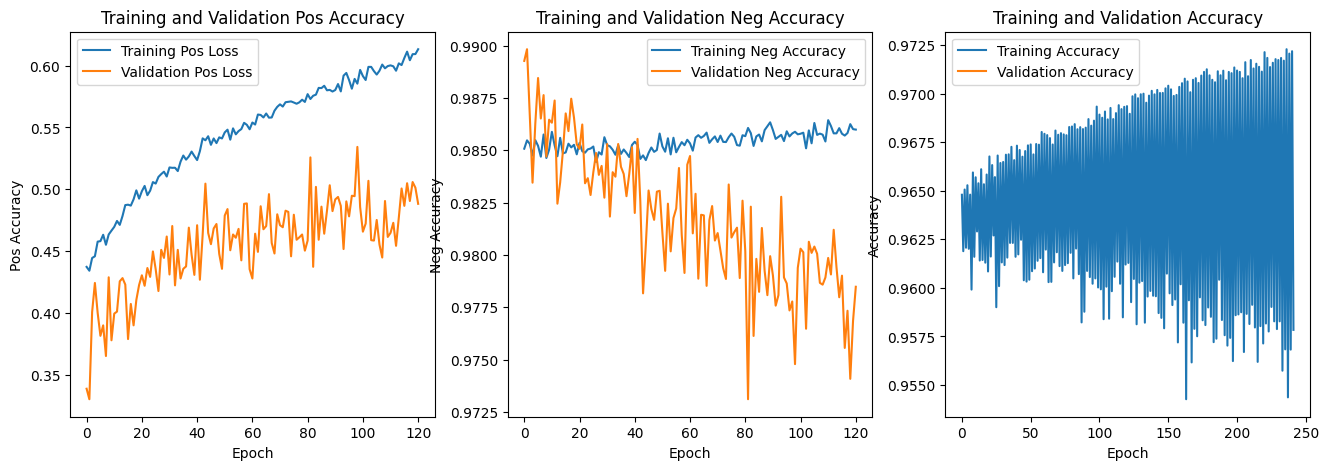

In [100]:
# Accuracy curves
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(train_pos_accuracy_withEpochs, label="Training Pos Loss")
plt.plot(val_pos_accuracy_withEpochs, label="Validation Pos Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Pos Accuracy")
plt.title("Training and Validation Pos Accuracy")


# Plot the training and validation accuracy
plt.subplot(1, 3, 2)
plt.plot(train_neg_accuracy_withEpochs, label="Training Neg Accuracy")
plt.plot(val_neg_accuracy_withEpochs, label="Validation Neg Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Neg Accuracy")
plt.title("Training and Validation Neg Accuracy")

# Plot the training and validation accuracy
plt.subplot(1, 3, 3)
plt.plot(train_accuracy_withEpochs, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

plt.show()

In [559]:
# Evaluation

selected_index = 102


dataset = val_dataset
processed_data_list.copy()

gcn_model.eval()
link_predictor.eval()

node_emb = gcn_model(dataset[selected_index].x_2d, dataset[selected_index].edge_index_can)
src_emb = node_emb[dataset[selected_index].edge_index_can[0]]
dst_emb = node_emb[dataset[selected_index].edge_index_can[1]]

pos_pred = (link_predictor(src_emb, dst_emb)> 0.5)
print(len(dataset[selected_index].edge_index_can[0]))

70


In [560]:
link_predictor(src_emb, dst_emb)

tensor([[9.7061e-03],
        [1.6946e-07],
        [2.7190e-22],
        [3.3503e-06],
        [8.5871e-01],
        [3.9167e-02],
        [2.5564e-02],
        [1.3182e-10],
        [5.1707e-04],
        [9.7418e-02],
        [3.3794e-03],
        [4.1649e-04],
        [7.8584e-02],
        [4.6384e-03],
        [1.4459e-03],
        [1.7558e-02],
        [3.2958e-03],
        [8.6433e-03],
        [9.9724e-04],
        [9.3934e-04],
        [2.0390e-04],
        [6.0879e-09],
        [6.7798e-07],
        [1.1583e-13],
        [9.7539e-15],
        [2.8008e-10],
        [9.8344e-08],
        [5.7881e-05],
        [9.3190e-13],
        [1.5450e-11],
        [4.9412e-09],
        [2.7436e-03],
        [1.5844e-10],
        [6.3694e-03],
        [2.5005e-05],
        [1.2870e-02],
        [3.8486e-01],
        [1.2077e-01],
        [8.4831e-01],
        [3.1410e-02],
        [3.8154e-01],
        [3.4065e-06],
        [4.7030e-04],
        [3.3432e-23],
        [4.3001e-11],
        [5

In [561]:

dataset[selected_index].y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [562]:

num_pairs = dataset[selected_index].edge_index_can.size(1)

# Initialize the result tensor with zeros
result_tensor = torch.zeros(num_pairs, dtype=torch.int)

# Convert tensor2 rows to a set of individual pairs
tensor2_set = set()
for row in dataset[selected_index].edge_index:
    for i in range(len(row) - 1):
        tensor2_set.add((row[i].item(), row[i+1].item()))

# Fill in the result tensor with ones where there are matching combinations
for i in range(num_pairs):
    pair = (dataset[selected_index].edge_index_can[0, i].item(), dataset[selected_index].edge_index_can[1, i].item())
    if pair in tensor2_set:
        result_tensor[i] = 1


pos_pred_squeezed = pos_pred.squeeze()


combined_tensor = torch.stack((pos_pred_squeezed.detach(), result_tensor.detach()), dim=1)

formatted_tensor = []
for row in combined_tensor:
    formatted_row = [f"{x:.9f}".rstrip('0').rstrip('.') if i == 1 else str(int(x)) for i, x in enumerate(row)]
    formatted_tensor.append(formatted_row)

# Print the formatted tensor

print('COMPARISON','\n\n')
print('PREDICTED INDEX |', 'TRUE INDEX')
print()


#for row in formatted_tensor:
#    print("                  ".join(row))

COMPARISON 


PREDICTED INDEX | TRUE INDEX



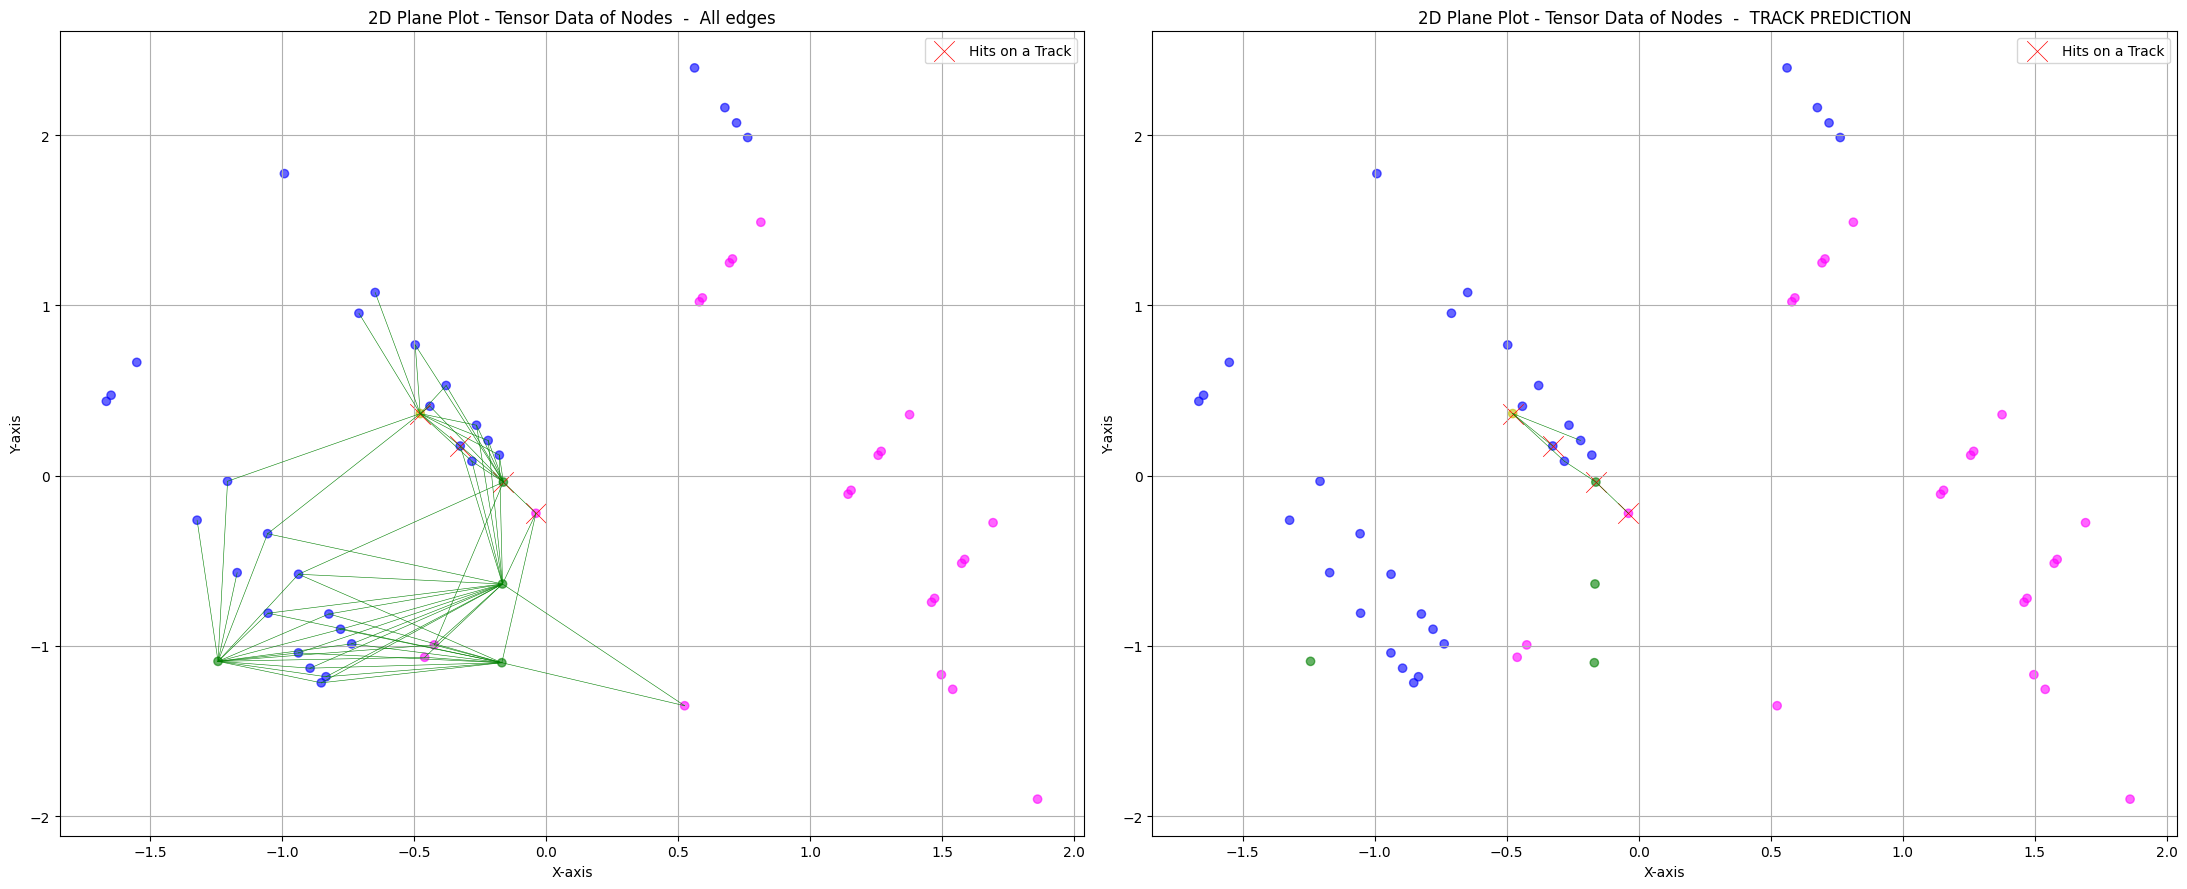

In [563]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

coordinate_data = dataset[selected_index].x_2d
coordinate_data_2 = (dataset[selected_index].x_2d)[(dataset[selected_index].y) == 1]

values = dataset[selected_index].layer

unique_values = values.unique()
num_unique_values = len(unique_values)
color_map = ListedColormap(['magenta', 'g', 'b', 'y'][:num_unique_values])

# Map values to colors
colors = [color_map(value.item()) for value in values]


data_edge_index_can = dataset[selected_index].edge_index_can
mask = pos_pred[:, 0]

predicted_edges = data_edge_index_can#[:, mask]

x = coordinate_data[:, 0]
y = coordinate_data[:, 1]

p = coordinate_data_2[:, 0]
q = coordinate_data_2[:, 1]

# Create a figure with a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 9))

# First subplot (left)

ax1.scatter(x, y, c=colors, marker='o', alpha=0.6)
ax1.scatter(p, q, label="Hits on a Track", color='r', marker='x', s=220, linewidth=0.5)
for i in range(predicted_edges.shape[1]):
    idx1 = predicted_edges[0, i]
    idx2 = predicted_edges[1, i]
    ax1.plot([x[idx1], x[idx2]], [y[idx1], y[idx2]], color='g', linewidth=0.4)
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_title("2D Plane Plot - Tensor Data of Nodes  -  All edges")
ax1.grid(True)
ax1.legend()

# Second subplot (right)
ax2.scatter(x, y, c=colors, marker='o', alpha=0.6)
ax2.scatter(p, q, label="Hits on a Track", color='r', marker='x', s=220, linewidth=0.5)

predicted_edges = data_edge_index_can[:, mask]

for i in range(predicted_edges.shape[1]):
    idx1 = predicted_edges[0, i]
    idx2 = predicted_edges[1, i]
    ax2.plot([x[idx1], x[idx2]], [y[idx1], y[idx2]], color='g', linewidth=0.4)
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_title("2D Plane Plot - Tensor Data of Nodes  -  TRACK PREDICTION")
ax2.grid(True)
ax2.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

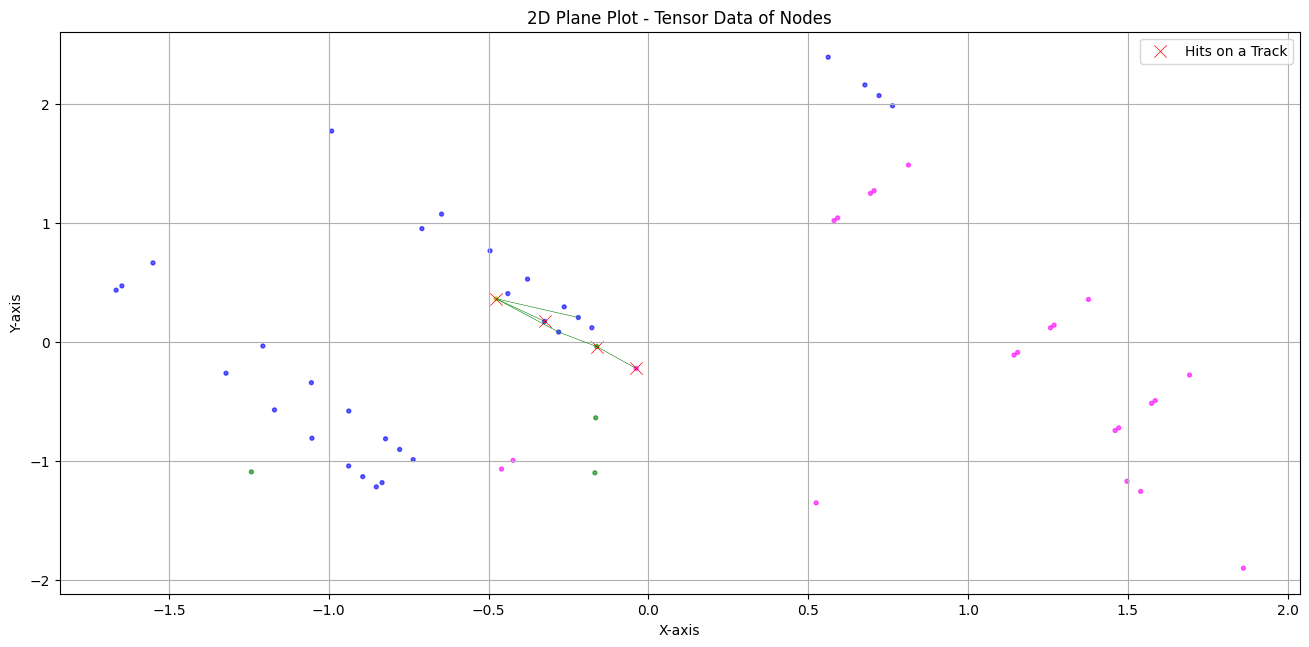

In [564]:
from matplotlib.colors import ListedColormap

coordinate_data = dataset[selected_index].x_2d
coordinate_data_2 = (dataset[selected_index].x_2d)[(dataset[selected_index].y) == 1]

values = dataset[selected_index].layer

unique_values = values.unique()
num_unique_values = len(unique_values)
color_map = ListedColormap(['magenta', 'g', 'b', 'y'][:num_unique_values])

# Map values to colors
colors = [color_map(value.item()) for value in values]


data_edge_index_can = dataset[selected_index].edge_index_can
mask = pos_pred[:, 0]

predicted_edges = data_edge_index_can[:, mask]

x = coordinate_data[:, 0]
y = coordinate_data[:, 1]

p = coordinate_data_2[:, 0]
q = coordinate_data_2[:, 1]


fig = plt.figure(figsize=(16, 7.3))

# Create a scatter plot
plt.scatter(x, y, c=colors, marker='o', s=8, alpha=0.6)
plt.scatter(p, q, label="Hits on a Track", color='r', marker='x', s=80, linewidth=0.5)
#plt.plot(predicted_edges_x, predicted_edges_y, linestyle='-', color='g')

for i in range(predicted_edges.shape[1]):
    idx1 = predicted_edges[0, i]  # Adjust index to zero-based indexing
    idx2 = predicted_edges[1, i]  # Adjust index to zero-based indexing
    plt.plot([x[idx1], x[idx2]], [y[idx1], y[idx2]], color='g', linewidth=0.4)


# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("2D Plane Plot - Tensor Data of Nodes")

# Show the plot
plt.grid(True)
plt.legend()
plt.show()